<a href="https://colab.research.google.com/github/Onethybeing/basic-dl-projects/blob/main/bg_remover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread("/content/cheet.jpeg")

In [8]:
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

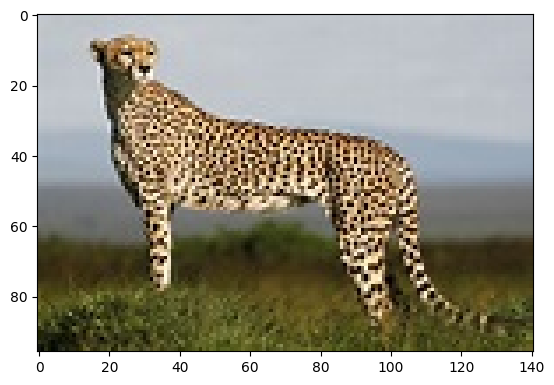

In [10]:
plt.imshow(image_rgb)

In [21]:
lower_white = np.array([0,0,120])
upper_white = np.array([30,80,255])

In [22]:
mask = cv2.inRange(image_hsv,lower_white,upper_white)

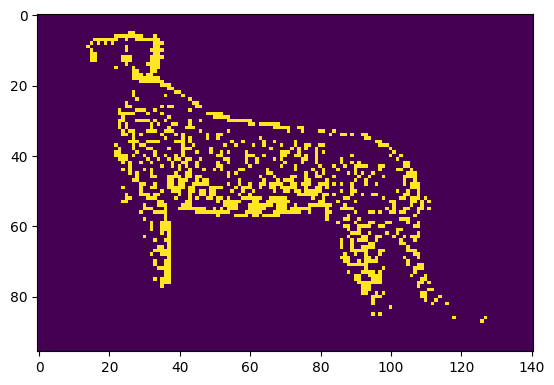

In [23]:
plt.imshow(mask)

In [29]:
black_hsv = np.uint8([[[120,255,0]]])
black_bgr = cv2.cvtColor(black_hsv,cv2.COLOR_HSV2BGR)[0][0]

In [37]:
image_result = image.copy()
image_result[mask>0] = black_bgr

In [38]:
image_result_rgb = cv2.cvtColor(image_result,cv2.COLOR_BGR2RGB)

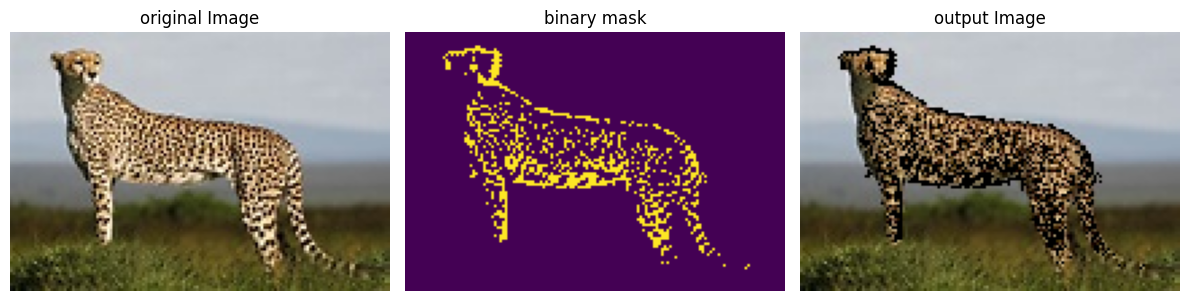

In [39]:
#plot
fig,axs = plt.subplots(1,3,figsize=(12,6))
axs[0].imshow(image_rgb)
axs[0].set_title("original Image")
axs[0].axis('off')
axs[1].imshow(mask)
axs[1].set_title("binary mask")
axs[1].axis('off')
axs[2].imshow(image_result_rgb)
axs[2].set_title("output Image")
axs[2].axis('off')
plt.tight_layout()
plt.show()

In [41]:
# Read image
image = cv2.imread("/content/cheet.jpeg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Better HSV range for yellow/tan (cheetah body)
lower = np.array([5, 50, 50])     # tweak for your image
upper = np.array([25, 255, 255])

In [46]:
# Create mask
mask = cv2.inRange(image_hsv, lower, upper)

# Optional: smooth mask to remove noise
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, np.ones((3,3), np.uint8))


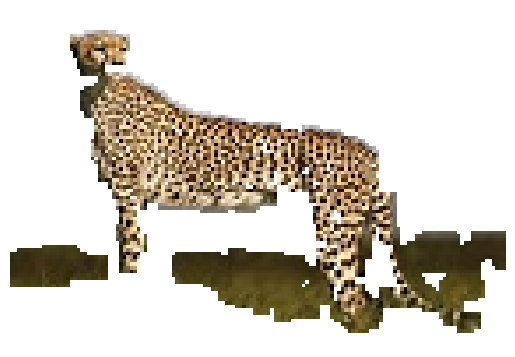

In [47]:
# Invert mask if you want to remove background
mask_inv = cv2.bitwise_not(mask)

# Make background transparent (4-channel RGBA)
result = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)
result[mask_inv != 0] = (0, 0, 0, 0)  # transparent background

# Save with transparency
cv2.imwrite('cheetah_no_bg.png', result)

# Show
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGRA2RGBA))
plt.axis('off')
plt.show()

In [48]:
image = cv2.imread("/content/cheet.jpeg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [50]:
#image resizing
print(image_rgb.shape)

(96, 141, 3)


In [51]:
new_height,new_width = 400,400
resized_image = cv2.resize(image_rgb,(new_width,new_height))

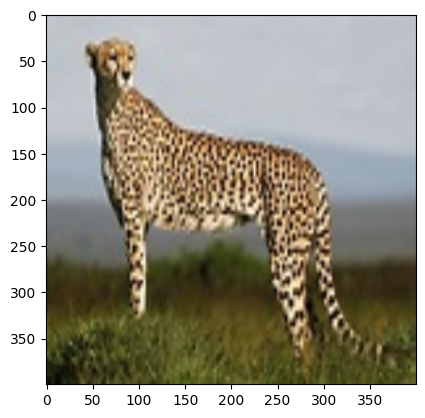

In [52]:
plt.imshow(resized_image)